In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nengo
from nengo import spa

from nengo_learn_assoc_mem.utils import BasicVecFeed, meg_from_spikes, make_alt_vocab

In [2]:
t_present = 0.3
t_pause = 0.1
dimensions = 32
n_neurons = 25
dt = 0.001
seed = 8

In [3]:
t_pres = int(t_present / dt)
t_paus = int(t_pause / dt)
slc_tm = (t_paus+t_pres)

In [4]:
vocab, fan1, fan1_vecs, fan2, fan2_vecs = make_alt_vocab(25, dimensions, seed, norm=True)

/home/saubin/git/nengo_spa/nengo_spa/vocab.py:105: UserWarning: Could not create a semantic pointer with max_similarity=0.10 (D=32, M=10)
  len(self.pointers)))
/home/saubin/git/nengo_spa/nengo_spa/vocab.py:105: UserWarning: Could not create a semantic pointer with max_similarity=0.10 (D=32, M=12)
  len(self.pointers)))
/home/saubin/git/nengo_spa/nengo_spa/vocab.py:105: UserWarning: Could not create a semantic pointer with max_similarity=0.10 (D=32, M=13)
  len(self.pointers)))
/home/saubin/git/nengo_spa/nengo_spa/vocab.py:105: UserWarning: Could not create a semantic pointer with max_similarity=0.10 (D=32, M=14)
  len(self.pointers)))
/home/saubin/git/nengo_spa/nengo_spa/vocab.py:105: UserWarning: Could not create a semantic pointer with max_similarity=0.10 (D=32, M=15)
  len(self.pointers)))
/home/saubin/git/nengo_spa/nengo_spa/vocab.py:105: UserWarning: Could not create a semantic pointer with max_similarity=0.10 (D=32, M=16)
  len(self.pointers)))
/home/saubin/git/nengo_spa/nengo_s

In [5]:
all_vecs = np.concatenate((fan1_vecs, fan2_vecs))
simi = np.dot(all_vecs, all_vecs.T)
np.fill_diagonal(simi, 0.)
intercept = np.ceil(np.max(simi)*100)/100
print(intercept)

0.62


In [12]:
all_labels = []
for i1, i2 in fan1+fan2:
    all_labels.append(f"{i1}+{i2}")

# Assoc Mem into Ensemble

In [7]:
res_neurons = 500

data_feed = BasicVecFeed(all_vecs, all_vecs, t_present, dimensions, len(all_vecs), t_pause)

with nengo.Network() as model:
    stim = nengo.Node(data_feed.feed)
    correct = nengo.Node(data_feed.get_answer)

    # Note: if the threshold is set too high, it won't respond even close to the MEG
    # because it will then ignore values that would otherwise be considered similar
    # so set it as low as possible to see MEG-like effects
    mem = nengo.networks.AssociativeMemory(all_vecs, n_neurons=n_neurons, threshold=0.1)
    res_ens = nengo.Ensemble(res_neurons, dimensions)
    
    nengo.Connection(stim, mem.input, synapse=None)
    nengo.Connection(mem.output, res_ens)
    
    p_rec = nengo.Probe(mem.output, synapse=0.01)
    p_cor = nengo.Probe(correct, synapse=None)
    p_spikes = nengo.Probe(res_ens.neurons, synapse=None)

In [9]:
with nengo.Simulator(model) as sim:
    sim.run(len(all_vecs)*(t_present+t_pause) + t_pause)

/home/saubin/git/nengo/nengo/cache.py:501: UserWarning: Decoder cache could not acquire lock and was set to readonly mode.
  warnings.warn("Decoder cache could not acquire lock and was "


Building finished in 0:00:03.                                                   
Simulating finished in 0:00:12.                                                 


NameError: name 'all_labels' is not defined

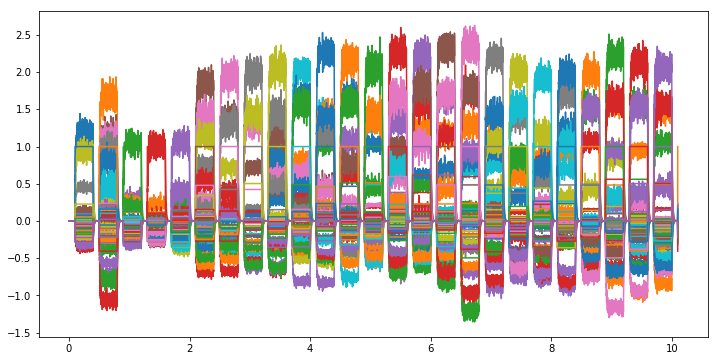

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(sim.trange(), spa.similarity(sim.data[p_rec], all_vecs))

plt.gca().set_prop_cycle(None)

plt.plot(sim.trange(), spa.similarity(sim.data[p_cor], all_vecs))

plt.legend(all_labels)

In [13]:
fan1

[('F1_0', 'F1_1'),
 ('F1_2', 'F1_3'),
 ('F1_4', 'F1_5'),
 ('F1_6', 'F1_7'),
 ('F1_8', 'F1_9')]

In [16]:
fan2

[('F2_0', 'F2_1'),
 ('F2_0', 'F2_2'),
 ('F2_3', 'F2_2'),
 ('F2_3', 'F2_1'),
 ('F2_4', 'F2_5'),
 ('F2_4', 'F2_6'),
 ('F2_7', 'F2_6'),
 ('F2_7', 'F2_5'),
 ('F2_8', 'F2_9'),
 ('F2_8', 'F2_10'),
 ('F2_11', 'F2_10'),
 ('F2_11', 'F2_9'),
 ('F2_12', 'F2_13'),
 ('F2_12', 'F2_14'),
 ('F2_15', 'F2_14'),
 ('F2_15', 'F2_13'),
 ('F2_16', 'F2_17'),
 ('F2_16', 'F2_18'),
 ('F2_19', 'F2_18'),
 ('F2_19', 'F2_17')]